# Descriptive Statistics and Python Implementation

   Descriptive Statistics is describing, presenting, summarizing and organizing the data (population), either through numerical calculations or graphs or tables.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats

In [3]:
df=pd.read_csv("Downloads/data.csv")

In [5]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


## 1. Mean: 
   Average of the datasets.           

$$ mean = \frac{sum(n)}{len(n)} $$

Calculating average of monthy_income and monthy_expense column in a data.csv file without library functions and with library functions.

In [6]:
mean_income=sum(df["Mthly_HH_Income"])/len(df["Mthly_HH_Income"])
print(mean_income)
mean_income1=df["Mthly_HH_Income"].mean()
print(mean_income1)

41558.0
41558.0


In [7]:
mean_expense=sum(df["Mthly_HH_Expense"])/len(df["Mthly_HH_Expense"])
print(mean_expense)
mean_expense1=df["Mthly_HH_Expense"].mean()
print(mean_expense1)

18818.0
18818.0


## 2. Median:
   The median is the “middle” value or midpoint in your data and is also called the 50th percentile.

  $$ median = \frac{n +1}{2}$$

In [90]:
median_ann_income=df["Annual_HH_Income"].median()
print(median_ann_income)

x = len(df['Annual_HH_Income'])
i = x// 2
if x % 2==0:
  median=sum(sorted(df['Annual_HH_Income'])[i - 1:i + 1]) / 2
median=sorted(df['Annual_HH_Income'])[i]
print(median)

94.97966446470251
95.08875116502777


## Mode:
   The mode is the value or category that occurs most often within the data. Therefore a dataset has no mode, if no number is repeated or if no category is the same. 
#### Unimodal-Distribution has only one peak, which means it has only one frequently occurring score, clustered at the top.
#### Bimodal-Distribution has two values that occur frequently (two peaks). 
#### Multimodal-Distribution has two or several frequently occurring values.

$$ mode = l + \frac{(f_m - f_1) * h}{(f_m - f_1) + (f_m-f_2)}$$

where:
$l$=lower limit of modal class,$f$= Frequency of the modal class,$f_1$ = Frequency of the previous modal class,$f_2$ = Frequency of the sucessive modal class,$h$ =Height or Size of the class interval

In [17]:
mode=df["Highest_Qualified_Member"].mode()
print(mode)

from collections import Counter
def modal(a_income):
    n = Counter(a_income)
    return [a for a, i in n.items() if i == n.most_common(1)[0][1]]
modal(df["Highest_Qualified_Member"])

0    Graduate
dtype: object


['Graduate']

## Variance:
   It tells about how data is spread across the mean.The variance is computed by finding the difference between every data point and the mean, squaring them, summing them up and then taking the average of those numbers.

$$ var =  \frac{\Sigma(x_i - \bar{x})^2}{n - 1}$$

where:$x_i$ = ith element in given column,$\bar{x}$ = mean of the column,$n$ = number of obervations

In [18]:
variance=np.var(df["Annual_HH_Income"])
print(variance)

mean = sum(df["Annual_HH_Income"]) / len(df["Annual_HH_Income"])
var = sum((xi - mean) ** 2 for xi in df["Annual_HH_Income"]) / len(df["Annual_HH_Income"])
print(var)

100437186889.95831
100437186889.95831


## Standard Deviation:
   It is a square root of variance.

$$ \sigma =  \sqrt\frac{\Sigma(x_i - \bar{x})^2}{n - 1}$$

In [23]:
std1=np.std(df["Annual_HH_Income"])
print(std1)

std2=math.sqrt(var)
print(std2)

316918.26531451027
316918.26531451027


## Correlation:
  Correlation is a statistic that measures the degree to which two variables move in relation to each other.

Four Types of correlations: \
    Pearson correlation, Kendall rank correlation, Spearman correlation, and the Point-Biserial correlation.
    Now we will see only Pearson Correlation.

### Pearson correlation:
   Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.If closer to +1 positively correlated otherwise if closer to -1 neagtively correlated

$$ pearson =  \frac{\Sigma(x_i - \bar{x})(y_i - \bar{y})}{\sqrt\Sigma(x_i - \bar{x})^2\Sigma(y_i - \bar{y})^2}$$

In [88]:
corr=df['Mthly_HH_Income'].corr(df['Mthly_HH_Expense'])
print(corr)

x=df['Mthly_HH_Income']
y=df['Mthly_HH_Expense']
n = len(x)
sum_x = float(sum(x))
sum_y = float(sum(y))
sum_xx = sum(pow(xi,2) for xi in x)
sum_yy = sum(pow(yi,2) for yi in y)
t = sum(xi*yi for xi, yi in zip(x, y))
corr1 =(t - (sum_x * sum_y/n))/(pow((sum_xx - pow(sum_x, 2) / n) * (sum_yy - pow(sum_y, 2) / n), 0.5))
print(corr1)

0.6357236431193678
0.6357236431193718


## Normal Distribution:

The normal distribution is the most important probability distribution in statistics because it fits many natural phenomena. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution. It is also known as the Gaussian distribution and the bell curve.<br/><br/>
   It describes how the values of a variable are distributed. It is a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. 

$$ f(x) =  \frac{1}{\sigma\sqrt2\pi} e ^ {\frac{-(x-\mu)^2}{2\sigma^2}}$$

where:<br/>
$x$ = Column values<br/>
$\mu$ = mean<br/>
$\sigma$ = Standard Deviation

C:\Users\selvakumar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


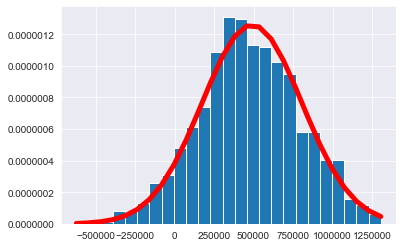

In [54]:
mean_annual=sum(df["Annual_HH_Income"])/len(df["Annual_HH_Income"])
s = np.random.normal(mean_annual,std2, 1000)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 25, normed=True)

# Plot the distribution curve
plt.plot(bins, 1/(std2 * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mean_annual)**2 / (2 * std2**2) ),linewidth=5, color='r')
plt.show()

In [ ]:
# In the above fig it represents a histogram which is not a best way to represent a normal distribution 
# so we will next use distplot to represent ND in a more understandable format.

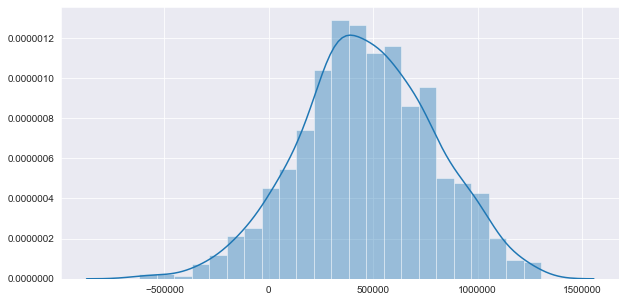

In [60]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.distplot(s)

In [ ]:
#From the above fig the Annual_Income looks like normally distributed.But we will see whether it is normally distributed or not later.

## Features Of Normal Distribution:

1.The total area under the curve is equal to 1.<br/>
2.The mean, median and mode are all equal.<br/>
3.The curve is symmetric around the mean.<br/>
4.1.Approximately 68% of values in the distribution are within 1 std from the mean:P (µ - σ < X < µ + σ) = 0.68<br/>
4.2.Approximately 95% of values in the distribution are within 2 std from the mean:P (µ - 2σ < X < µ + 2σ) = 0.95<br/>
4.3.Approximately 99.7% of values in the distribution are within 3 std from the mean:P (µ - 3σ < X < µ + 3σ) = 0.997

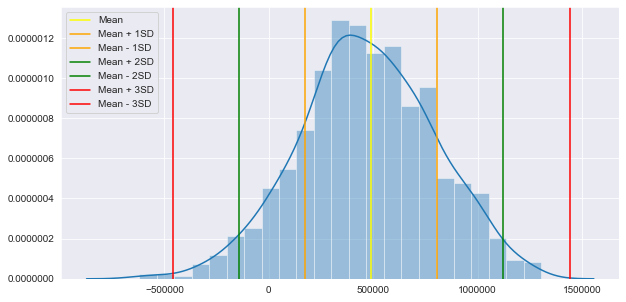

In [58]:
one_std_r = mean_annual + (1 * std1)
one_std_l = mean_annual - (1 * std1)
two_std_r = mean_annual + (2 * std1)
two_std_l = mean_annual - (2 * std1)
three_std_r = mean_annual + (3 * std1)
three_std_l = mean_annual - (3 * std1)

plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.distplot(s)


plt.axvline(mean_annual, color='yellow', label='Mean')

plt.axvline(one_std_r, color='orange', label='Mean + 1SD')
plt.axvline(one_std_l, color='orange', label='Mean - 1SD')
plt.axvline(two_std_r, color='green', label='Mean + 2SD')
plt.axvline(two_std_l, color='green', label='Mean - 2SD')
plt.axvline(three_std_r, color='red', label='Mean + 3SD')
plt.axvline(three_std_l, color='red', label='Mean - 3SD')
plt.legend();

## Positively Skewed and Negatively Skewed:   

 +ve skewed:If the data is piled up to the left, which leaves the tail pointing to the right.<br/>
 -ve skewed:If the data is piled up to the right, which leaves the tail pointing to the left.

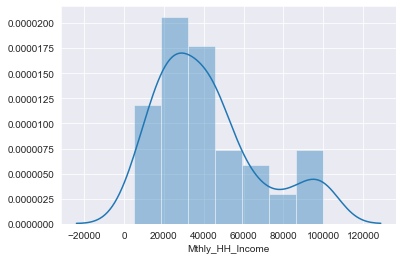

In [76]:
sns.distplot(df["Mthly_HH_Income"], kde = True)

In [82]:
print(df['Mthly_HH_Income'].mean())
print(df['Mthly_HH_Income'].median())
print(df['Mthly_HH_Income'].mode())

41558.0
35000.0
0    45000
dtype: int64


In [ ]:
## From this we can see that mean,median,mode are highly different so we can assume that they are not normally distributed.

## Q-Q plot 
 To test whether the given data of a columns are normally distributed or not.

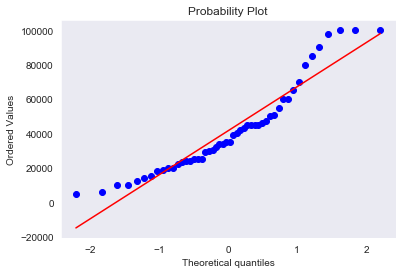

In [83]:
stats.probplot(df['Mthly_HH_Income'], dist="norm", plot=plt)
plt.grid()

In [ ]:
##From the above fig we can say that the above data is not normally ditributed.

## Boxcox:
   To convert the given data into a normal distribution.

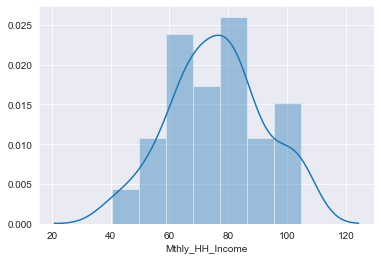

In [84]:
df['Mthly_HH_Income'] = stats.boxcox(df['Mthly_HH_Income'])[0]

sns.distplot(df['Mthly_HH_Income'], kde = True)

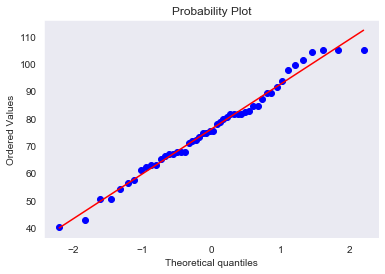

In [85]:
stats.probplot(df['Mthly_HH_Income'], dist="norm", plot=plt)
plt.grid()

In [86]:
print(df['Mthly_HH_Income'].mean())
print(df['Mthly_HH_Income'].median())
print(df['Mthly_HH_Income'].mode())

76.08387276753646
75.3764528594088
0    81.604381
dtype: float64


In [ ]:
## Now we can say that the differrence between mean,median,mode are not that much which follows normal distribution in a great manner.

### Similarly we plot for Annual_Income column:

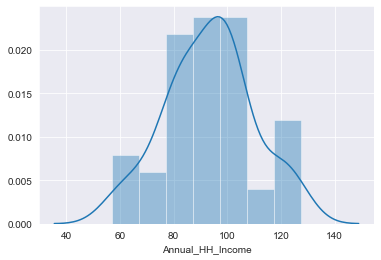

In [87]:
sns.distplot(df["Annual_HH_Income"], kde = True)

In [67]:
print(df['Annual_HH_Income'].mean())
print(df['Annual_HH_Income'].median())
print(df['Annual_HH_Income'].mode())

490019.04
447420.0
0    590400
dtype: int64


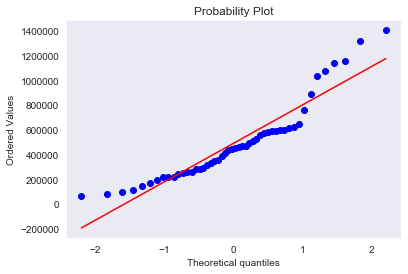

In [70]:
stats.probplot(df['Annual_HH_Income'], dist="norm", plot=plt)
plt.grid()

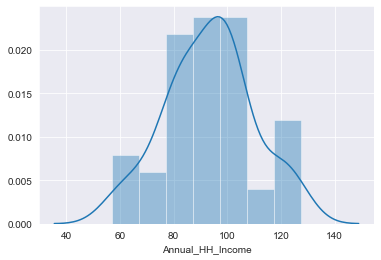

In [72]:
df['Annual_HH_Income'] = stats.boxcox(df['Annual_HH_Income'])[0]
sns.distplot(df['Annual_HH_Income'], kde = True)

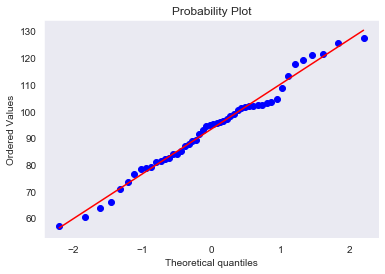

In [73]:
stats.probplot(df['Annual_HH_Income'], dist="norm", plot=plt)
plt.grid()

In [74]:
print(df['Annual_HH_Income'].mean())
print(df['Annual_HH_Income'].median())
print(df['Annual_HH_Income'].mode())

93.31291100016972
94.97966446470251
0    102.054408
dtype: float64
